In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from transformers import AutoTokenizer, AutoModel
import torch

import sqlite3
import pandas as pd


In [2]:
final_prompt_fewshot = pd.read_csv("results/final_prompt_fewshot_with_topics.csv", index_col=0)
equal_df = final_prompt_fewshot[(final_prompt_fewshot['effect_type_0'] == final_prompt_fewshot['effect_type_1']) &
                                (final_prompt_fewshot['effect_type_0'] == final_prompt_fewshot['effect_type_2'])]


In [3]:
equal_df['effect_type_0'].value_counts()

harmful    1769
helpful     225
neutral      74
unknown      54
Name: effect_type_0, dtype: int64

In [4]:
helpful = equal_df[equal_df['effect_type_0'] == 'helpful']
harmful = equal_df[equal_df['effect_type_0'] == 'harmful']
neutral = equal_df[equal_df['effect_type_0'] == 'neutral']
unknown = equal_df[equal_df['effect_type_0'] == 'unknown']

In [6]:

# equal_df.to_csv('equal_columns.csv')
# helpful.to_csv('helpful.csv')
# neutral.to_csv('neutral.csv')
# unknown.to_csv('unknown.csv')
# harmful.to_csv('harmful.csv')


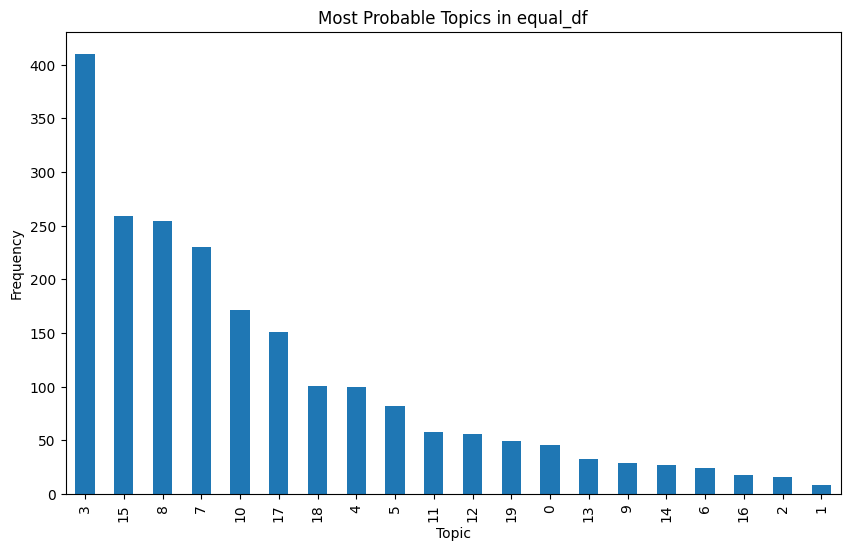

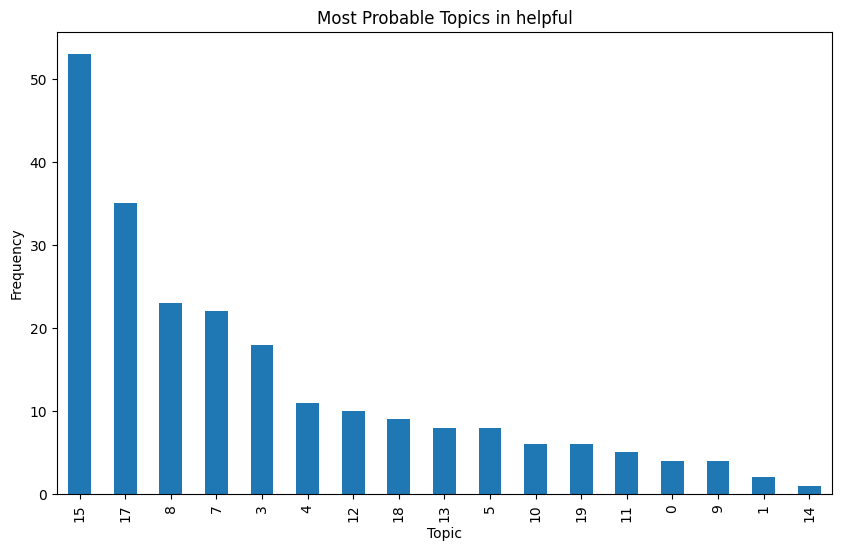

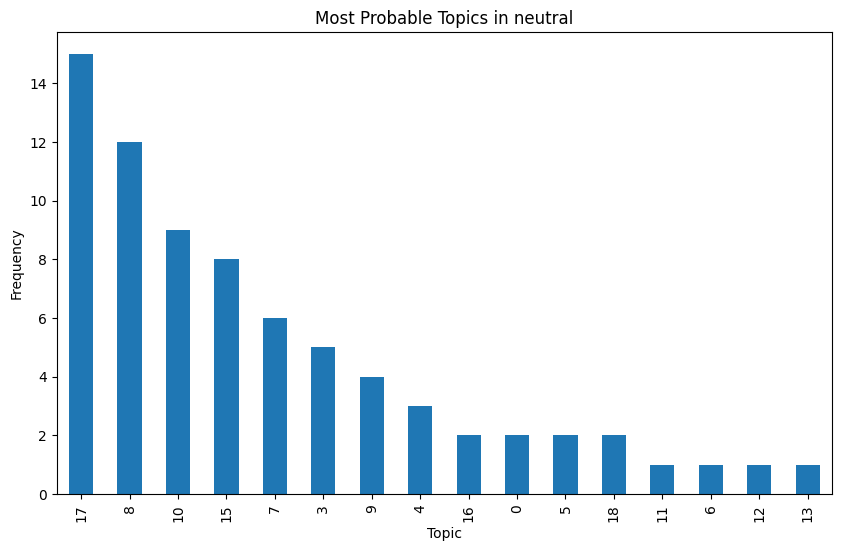

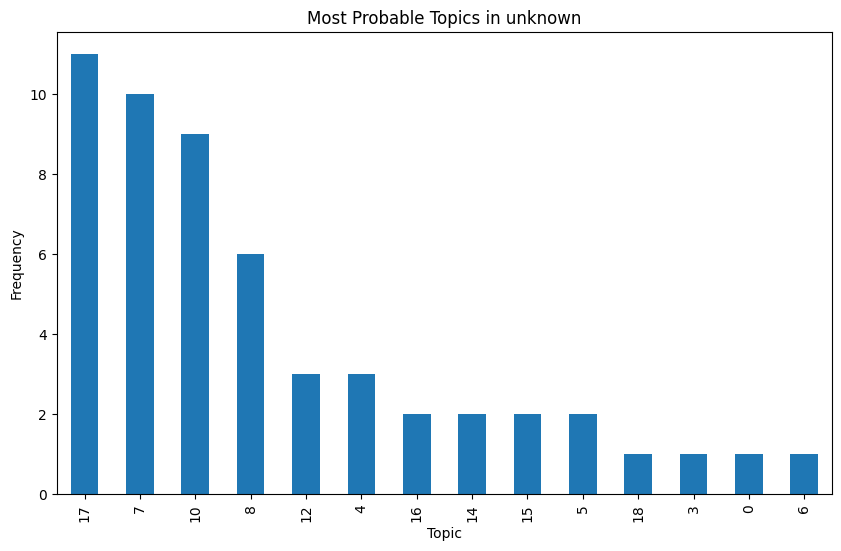

In [18]:
import matplotlib.pyplot as plt

dfs = [equal_df, helpful, neutral, unknown, harmful]

df_names = ['equal_df', 'helpful', 'neutral', 'unknown', 'harmful']

for df, name in zip(dfs, df_names):
    topic_freq = df['most_probable_topic'].value_counts()

    plt.figure(figsize=(10, 6))  # adjust as needed
    topic_freq.plot(kind='bar')
    plt.title(f'Most Probable Topics in {name}')
    plt.xlabel('Topic')
    plt.ylabel('Frequency')
    plt.show()


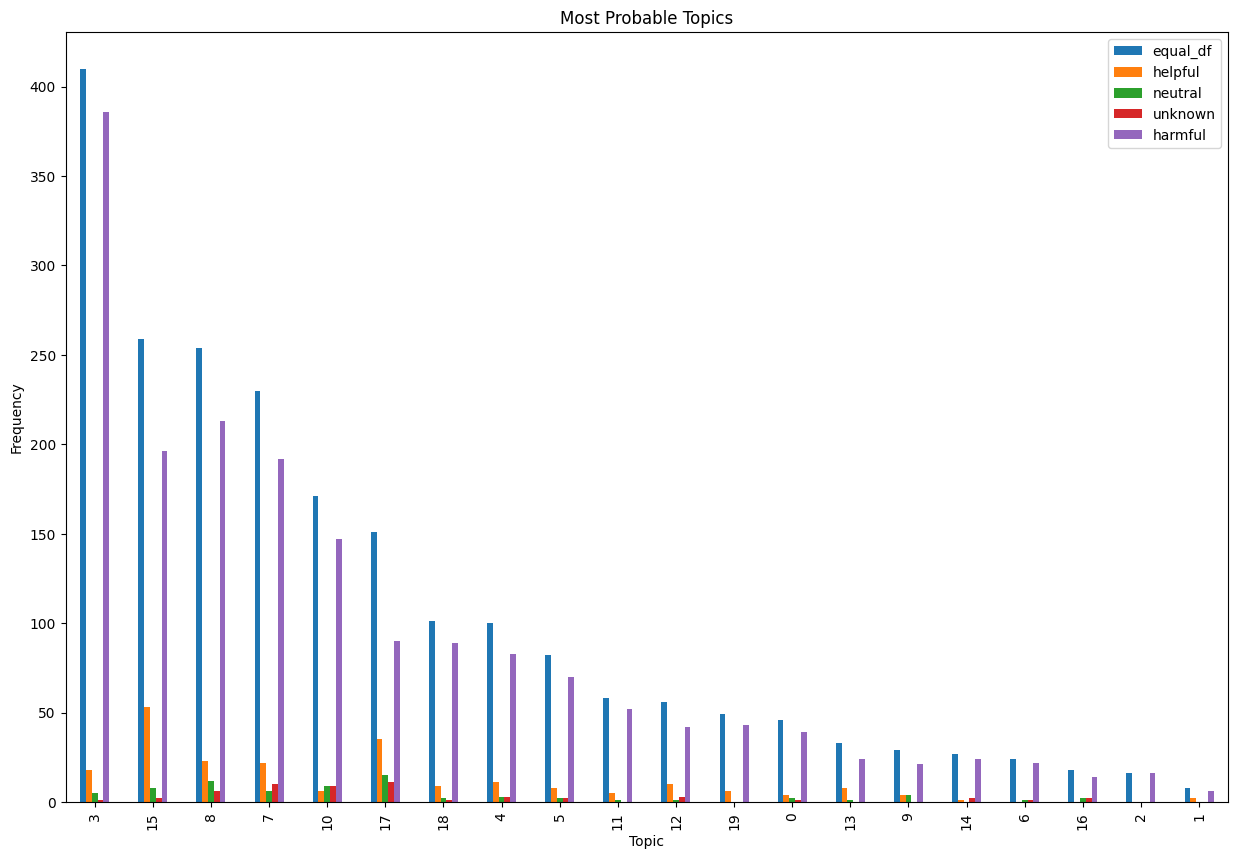

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# list of dataframes
dfs = [equal_df, helpful, neutral, unknown, harmful]

# names for the dataframes
df_names = ['equal_df', 'helpful', 'neutral', 'unknown', 'harmful']

# calculate frequency for each dataframe and store in a list
freqs = [df['most_probable_topic'].value_counts() for df in dfs]

# create a new dataframe to hold all frequencies, this will handle differing topics across dataframes
freq_df = pd.concat(freqs, axis=1)
freq_df.columns = df_names
freq_df.fillna(0, inplace=True)  # replace NaN values with 0

# create bar plot
freq_df.plot(kind='bar', figsize=(15, 10))
plt.title('Most Probable Topics')
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.show()


In [ ]:

equal_columns = pd.read_csv('equal_columns.csv')
helpful = pd.read_csv('helpful.csv')
neutral = pd.read_csv('neutral.csv')
unknown = pd.read_csv('unknown.csv')
harmful = pd.read_csv('harmful.csv')


In [12]:
# def get_analysis_info(data: pd.DataFrame, type: str):
#     column_name = f"narrative_{type}" 
#     print(f"Number of {type}: {sum(data[column_name])} / {len(data)}")
#     print(f"Values of flair flags: {data[data[column_name] == 1]['link_flair_text'].unique()}")
#     return data[data[column_name] == 1][["title","link_flair_text", "selftext"]]

# positive_df = get_analysis_info(filtered_df, "positive").reset_index(drop=True)

Number of positive: 159 / 15706
Values of flair flags: ['recovery story' 'story time' ':karma:personal story:karma:' 'my story'
 'progress']


In [11]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-mpnet-base-v2')

In [12]:
helpful['combined_effect_details'] = helpful[['effect_details_0', 'effect_details_1',
                                              'effect_details_2']].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
unknown['combined_effect_details'] = unknown[['effect_details_0', 'effect_details_1',
                                              'effect_details_2']].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
neutral['combined_effect_details'] = neutral[['effect_details_0', 'effect_details_1',
                                              'effect_details_2']].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
harmful['combined_effect_details'] = harmful[['effect_details_0', 'effect_details_1',
                                              'effect_details_2']].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)


/var/folders/32/km91km0x2s98wl2f_rb4gb0r0000gn/T/ipykernel_94586/4294243994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  helpful['combined_effect_details'] = helpful[['effect_details_0', 'effect_details_1',
/var/folders/32/km91km0x2s98wl2f_rb4gb0r0000gn/T/ipykernel_94586/4294243994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown['combined_effect_details'] = unknown[['effect_details_0', 'effect_details_1',
/var/folders/32/km91km0x2s98wl2f_rb4gb0r0000gn/T/ipykernel_94586/4294243994.py:5: Se

In [13]:

helpful['combined_factors'] = helpful[['factors_0', 'factors_1', 'factors_2']].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
unknown['combined_factors'] = unknown[['factors_0', 'factors_1', 'factors_2']].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
neutral['combined_factors'] = neutral[['factors_0', 'factors_1', 'factors_2']].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
harmful['combined_factors'] = harmful[['factors_0', 'factors_1', 'factors_2']].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)


/var/folders/32/km91km0x2s98wl2f_rb4gb0r0000gn/T/ipykernel_94586/683852504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  helpful['combined_factors'] = helpful[['factors_0', 'factors_1', 'factors_2']].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
/var/folders/32/km91km0x2s98wl2f_rb4gb0r0000gn/T/ipykernel_94586/683852504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown['combined_factors'] = unknown[['factors_0', 'factors_1', 'factors_2']].apply(lambda x: ' '.join(x.dropna().astype

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from transformers import AutoTokenizer, AutoModel
import torch

def get_cls_token(text):
    
    with torch.no_grad():
        outputs = model.encode(text)
    return outputs


helpful['ced_bert_vector'] = helpful['combined_effect_details'].apply(get_cls_token)
unknown['ced_bert_vector'] = unknown['combined_effect_details'].apply(get_cls_token)
neutral['ced_bert_vector'] = neutral['combined_effect_details'].apply(get_cls_token)
harmful['ced_bert_vector'] = harmful['combined_effect_details'].apply(get_cls_token)






/var/folders/32/km91km0x2s98wl2f_rb4gb0r0000gn/T/ipykernel_94586/629728721.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  helpful['ced_bert_vector'] = helpful['combined_effect_details'].apply(get_cls_token)
/var/folders/32/km91km0x2s98wl2f_rb4gb0r0000gn/T/ipykernel_94586/629728721.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown['ced_bert_vector'] = unknown['combined_effect_details'].apply(get_cls_token)
/var/folders/32/km91km0x2s98wl2f_rb4gb0r0000gn/T/ipykernel_94586/629728721.py:18: Sett

In [15]:
helpful['factor_bert_vector'] = helpful['combined_factors'].apply(get_cls_token)
unknown['factor_bert_vector'] = unknown['combined_factors'].apply(get_cls_token)
neutral['factor_bert_vector'] = neutral['combined_factors'].apply(get_cls_token)
harmful['factor_bert_vector'] = harmful['combined_factors'].apply(get_cls_token)


/var/folders/32/km91km0x2s98wl2f_rb4gb0r0000gn/T/ipykernel_94586/473028740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  helpful['factor_bert_vector'] = helpful['combined_factors'].apply(get_cls_token)
/var/folders/32/km91km0x2s98wl2f_rb4gb0r0000gn/T/ipykernel_94586/473028740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown['factor_bert_vector'] = unknown['combined_factors'].apply(get_cls_token)
/var/folders/32/km91km0x2s98wl2f_rb4gb0r0000gn/T/ipykernel_94586/473028740.py:3: SettingWithCopy

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


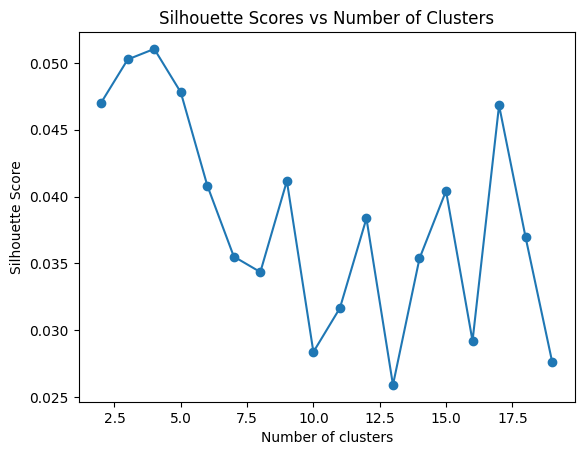

/var/folders/32/km91km0x2s98wl2f_rb4gb0r0000gn/T/ipykernel_94586/388378525.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{column}_cluster'] = kmeans.fit_predict(X)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


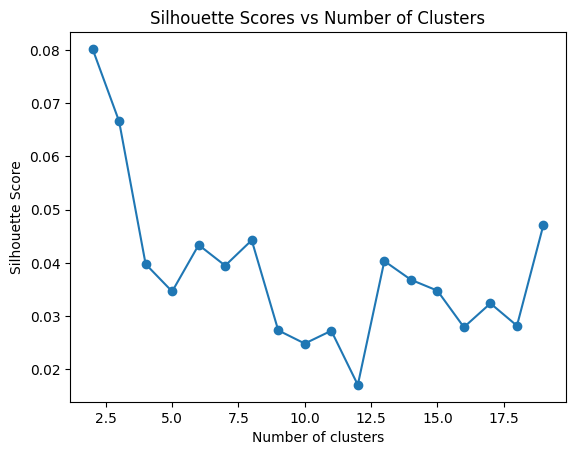

/var/folders/32/km91km0x2s98wl2f_rb4gb0r0000gn/T/ipykernel_94586/388378525.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{column}_cluster'] = kmeans.fit_predict(X)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


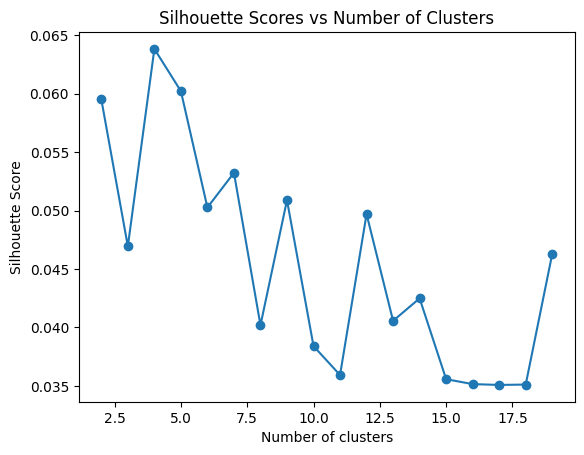

/var/folders/32/km91km0x2s98wl2f_rb4gb0r0000gn/T/ipykernel_94586/388378525.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{column}_cluster'] = kmeans.fit_predict(X)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


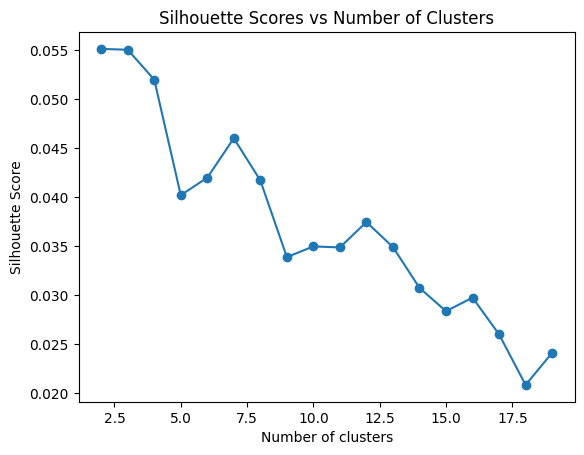

/var/folders/32/km91km0x2s98wl2f_rb4gb0r0000gn/T/ipykernel_94586/388378525.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{column}_cluster'] = kmeans.fit_predict(X)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


/var/folders/32/km91km0x2s98wl2f_rb4gb0r0000gn/T/ipykernel_94586/388378525.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{column}_cluster'] = kmeans.fit_predict(X)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


/var/folders/32/km91km0x2s98wl2f_rb4gb0r0000gn/T/ipykernel_94586/388378525.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{column}_cluster'] = kmeans.fit_predict(X)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


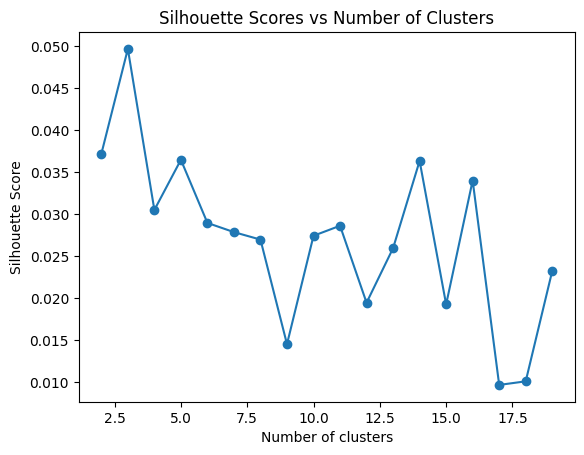

/var/folders/32/km91km0x2s98wl2f_rb4gb0r0000gn/T/ipykernel_94586/388378525.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{column}_cluster'] = kmeans.fit_predict(X)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


/var/folders/32/km91km0x2s98wl2f_rb4gb0r0000gn/T/ipykernel_94586/388378525.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{column}_cluster'] = kmeans.fit_predict(X)


In [16]:

def get_clusters(df, column):
    X = np.vstack(df[column].values)
    cluster_range = range(2, 20)
    silhouette_scores = []

    for n_clusters in cluster_range:
        print(n_clusters)
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    plt.plot(cluster_range, silhouette_scores, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores vs Number of Clusters')
    plt.show()

    optimal_n_clusters = cluster_range[np.argmax(silhouette_scores)]

    kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
    df[f'{column}_cluster'] = kmeans.fit_predict(X)

get_clusters(helpful, column='ced_bert_vector')
get_clusters(unknown, column='ced_bert_vector')
get_clusters(neutral, column='ced_bert_vector')
get_clusters(harmful, column='ced_bert_vector')

get_clusters(helpful, column='factor_bert_vector')
get_clusters(unknown, column='factor_bert_vector')
get_clusters(neutral, column='factor_bert_vector')
get_clusters(harmful, column='factor_bert_vector')


In [22]:
from collections import Counter
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def top_keywords(df, cluster_name, cluster, column, n=10):
    words = []
    stop_words = set(stopwords.words('english'))
    for text in df[df[cluster_name] == cluster][column]:
        tokens = word_tokenize(text.lower())
        filtered_tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
        words.extend(filtered_tokens)
    word_counts = Counter(words)
    return word_counts.most_common(n)

thing = {'ced_bert_vector':'combined_effect_details', 'factor_bert_vector':'combined_factors'}
for df in [helpful, harmful, neutral, unknown]:
    print(df['effect_type_0'].values[0])
    for cluster_column in thing:
        print(thing[cluster_column])
        cluster_name = cluster_column + '_cluster'
        optimal_n_clusters = np.max(df[cluster_name]) + 1
        for cluster in range(optimal_n_clusters):
            print(f"Top keywords in cluster {cluster}: {top_keywords(df, cluster_name, cluster, thing[cluster_column], 20)}")
    print('\n')


helpful
combined_effect_details
Top keywords in cluster 0: [('recovery', 80), ('feeling', 63), ('eating', 59), ('purging', 54), ('weight', 41), ('food', 38), ('body', 32), ('due', 30), ('day', 30), ('stopped', 24), ('health', 24), ('binge', 21), ('able', 21), ('eat', 21), ('physical', 21), ('writer', 20), ('negative', 19), ('two', 17), ('bulimia', 17), ('relapse', 16)]
Top keywords in cluster 1: [('eating', 106), ('feeling', 98), ('food', 94), ('writer', 46), ('eat', 44), ('foods', 43), ('successfully', 40), ('binge', 30), ('proud', 28), ('fear', 28), ('recovery', 26), ('urge', 24), ('healthy', 21), ('acknowledging', 21), ('weight', 20), ('making', 19), ('progress', 18), ('meals', 18), ('guilty', 17), ('feel', 17)]
Top keywords in cluster 2: [('feeling', 114), ('weight', 35), ('recovery', 34), ('body', 28), ('eating', 24), ('improved', 18), ('normal', 17), ('mental', 16), ('better', 16), ('thoughts', 15), ('happy', 14), ('food', 14), ('motivated', 14), ('increased', 13), ('experiencing

In [23]:
helpful['effect_type_0'].values[0]

'helpful'

In [24]:
helpful.to_csv('with_clusters/helpful.csv')
harmful.to_csv('with_clusters/harmful.csv')
neutral.to_csv('with_clusters/neutral.csv')
unknown.to_csv('with_clusters/unknown.csv')


In [25]:
helpful.columns

Index(['id', 'subreddit', 'author_fullname', 'score', 'link_flair_css_class',
       'link_flair_text', 'author_flair_type', 'over_18', 'author_flair_text',
       'is_self', 'author_flair_css_class', 'permalink', 'url', 'num_words',
       'narrative_positive', 'narrative_negative', 'narrative_uncertain',
       'narrative_label', 'predicted_narrative_label', 'factors_0',
       'effect_type_0', 'effect_details_0', 'factors_1', 'effect_type_1',
       'effect_details_1', 'factors_2', 'effect_type_2', 'effect_details_2',
       'Topic Distribution', 'most_probable_topic', 'author', 'created_utc',
       'selftext', 'subreddit_id', 'title', 'combined_effect_details',
       'combined_factors', 'ced_bert_vector', 'factor_bert_vector',
       'ced_bert_vector_cluster', 'factor_bert_vector_cluster'],
      dtype='object')

helpful


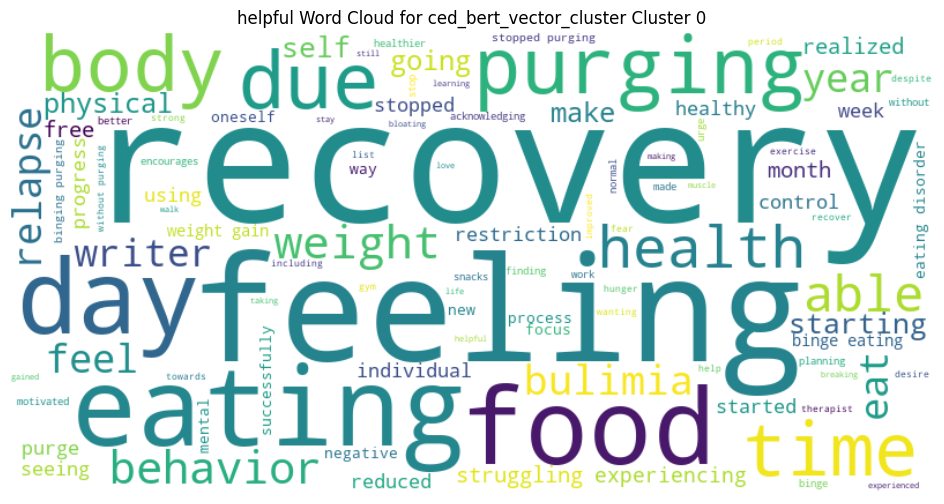

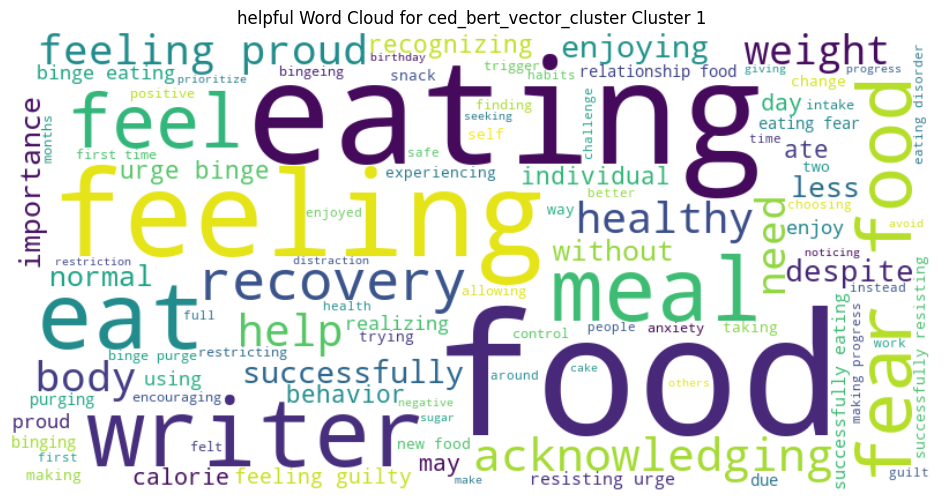

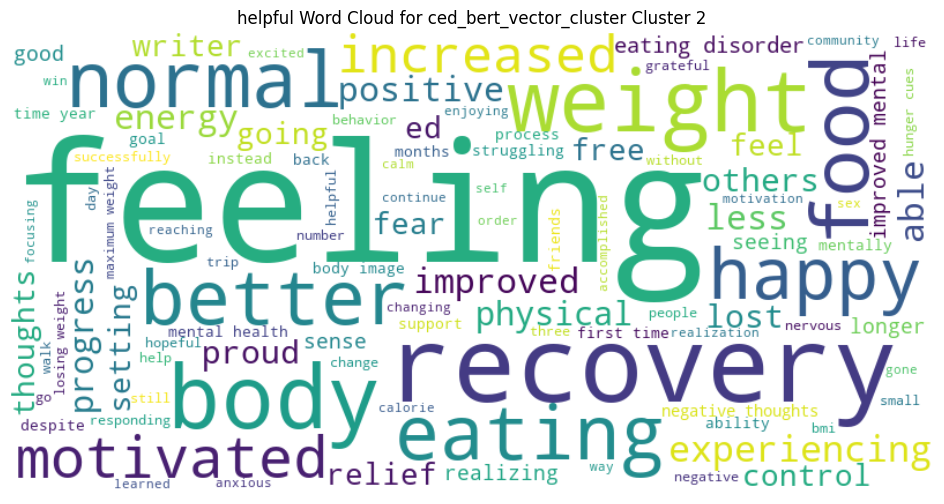

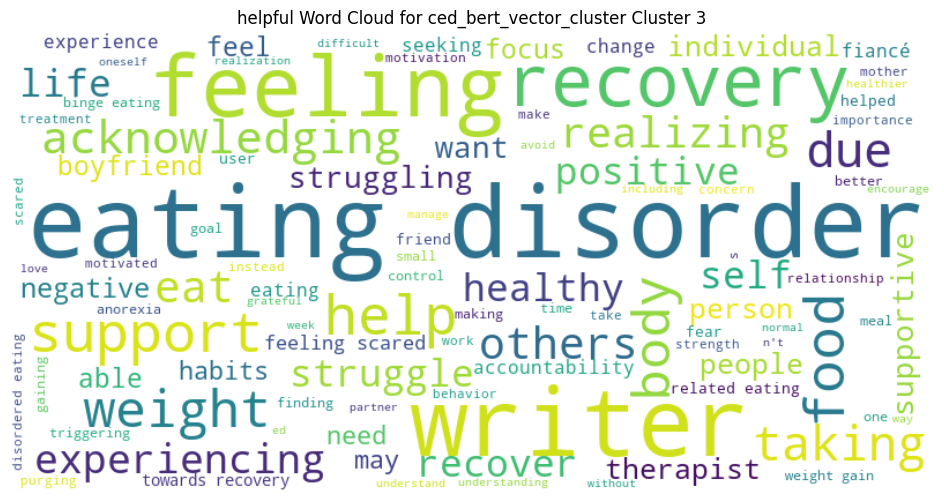

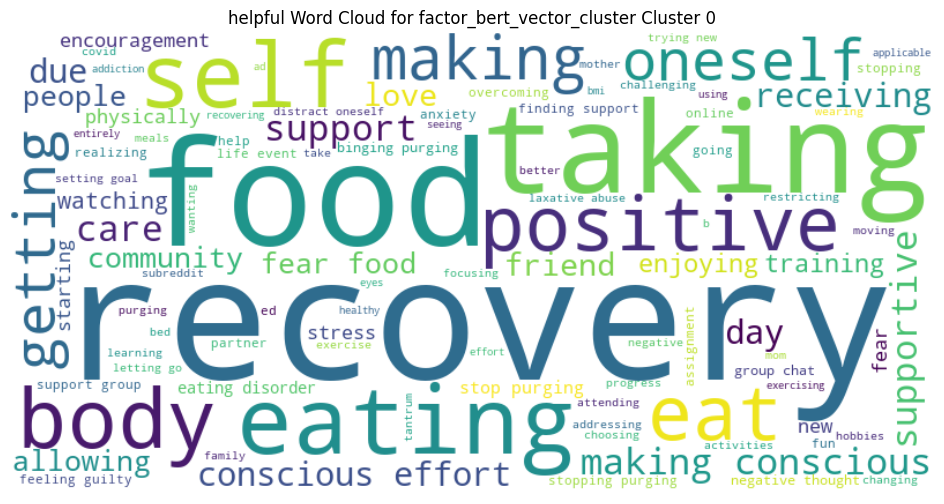

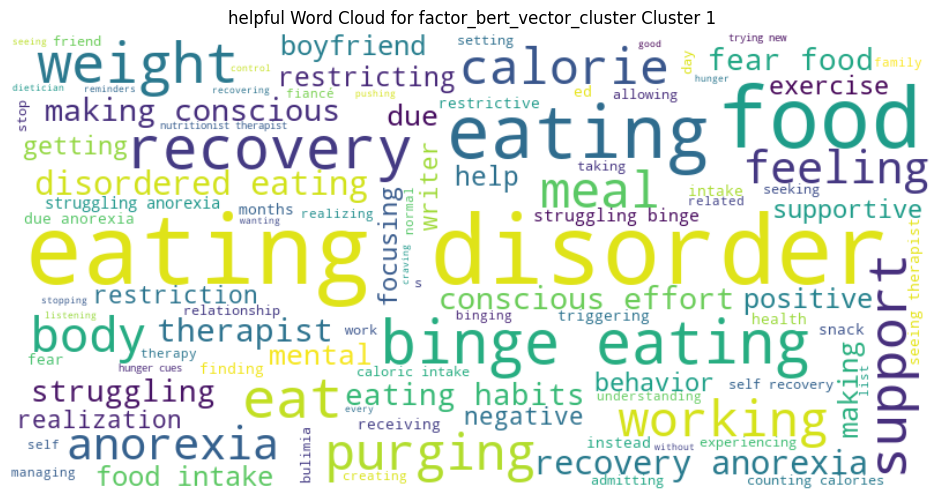

harmful


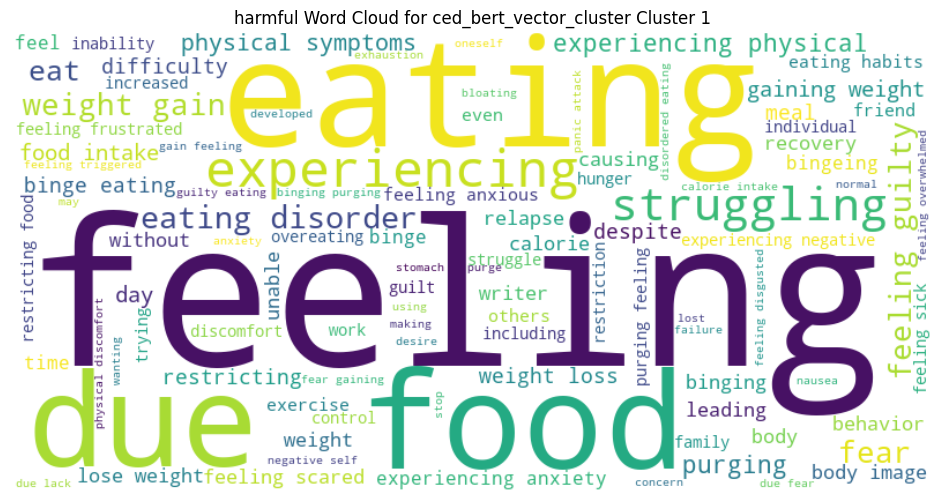

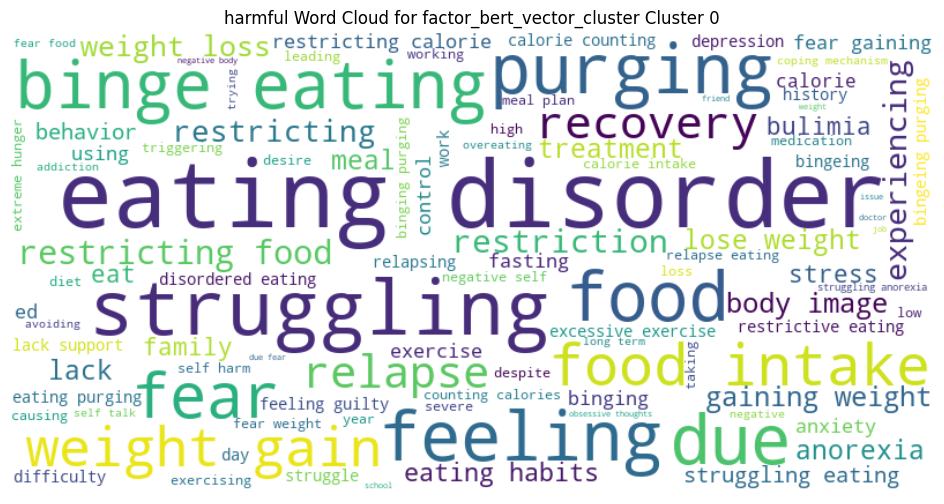

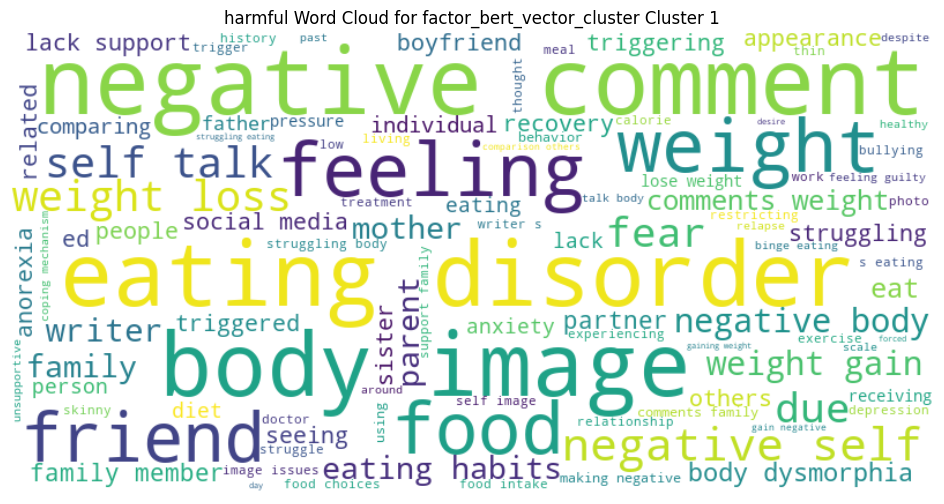

neutral


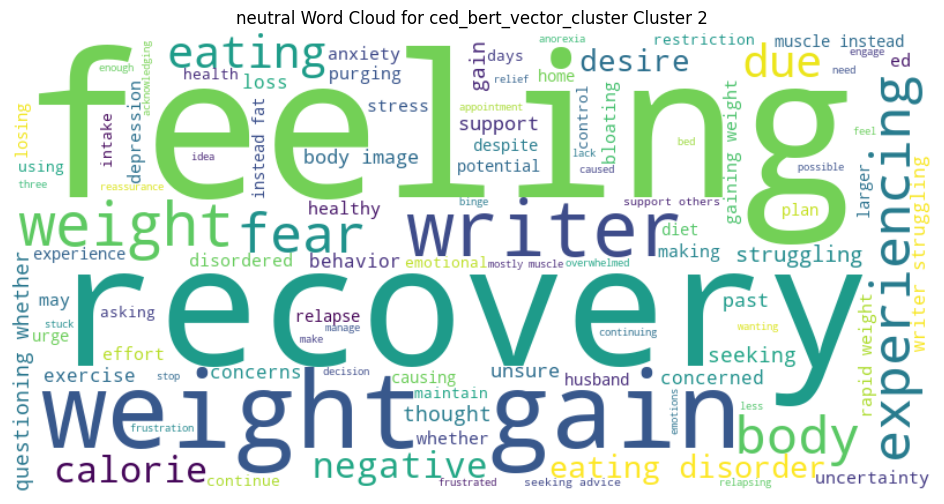

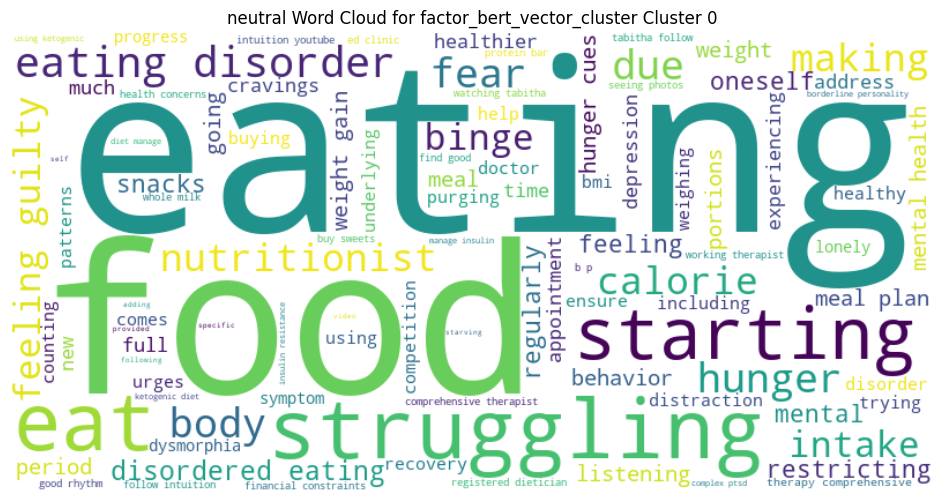

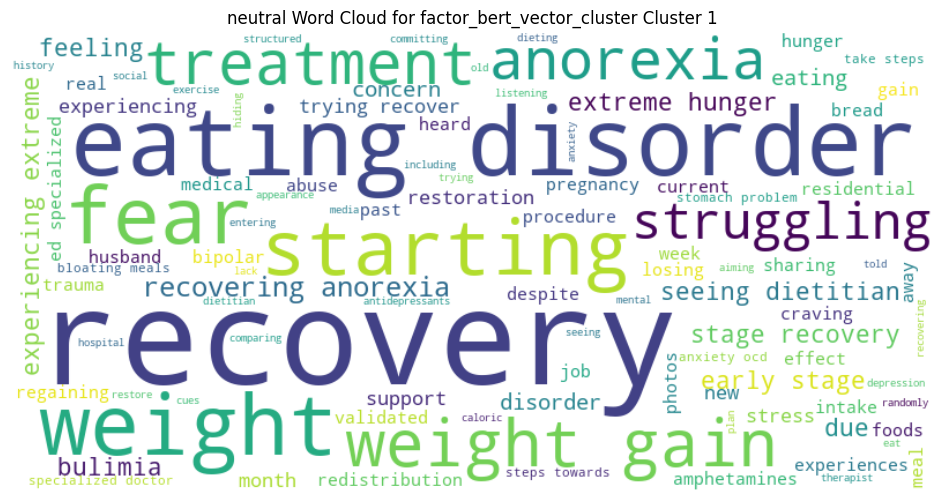

unknown


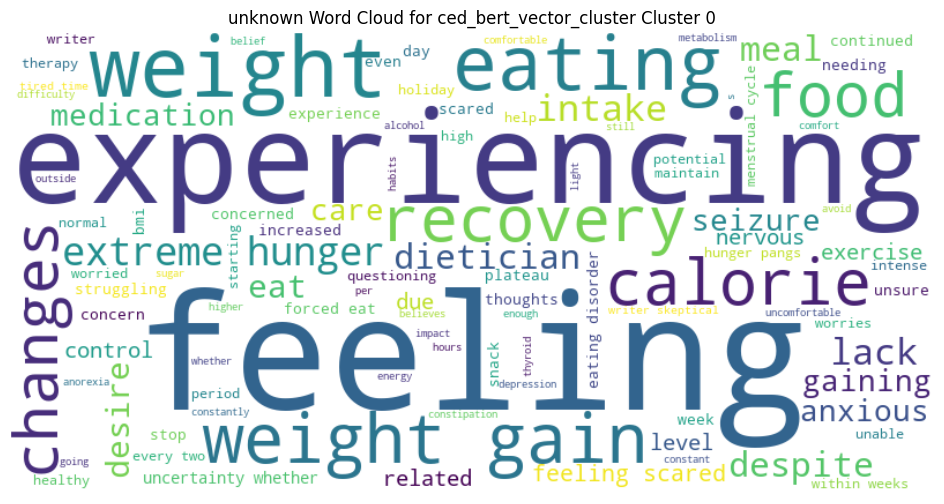

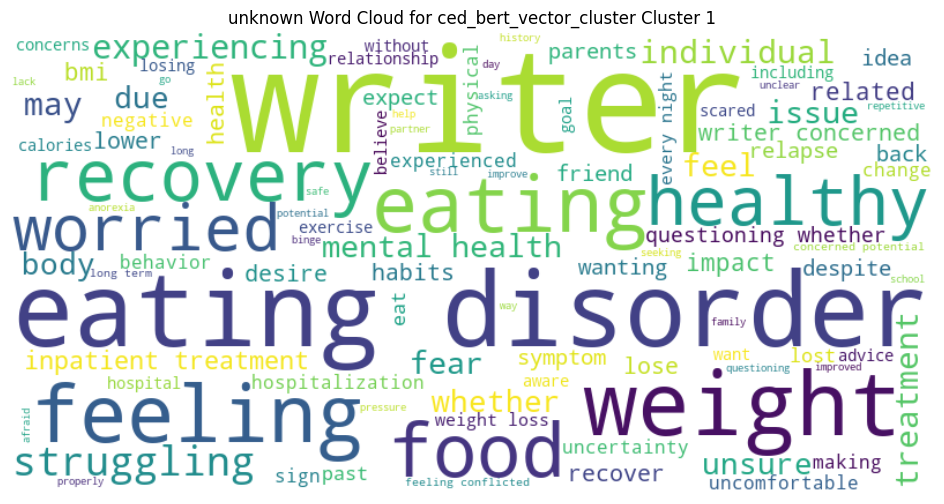

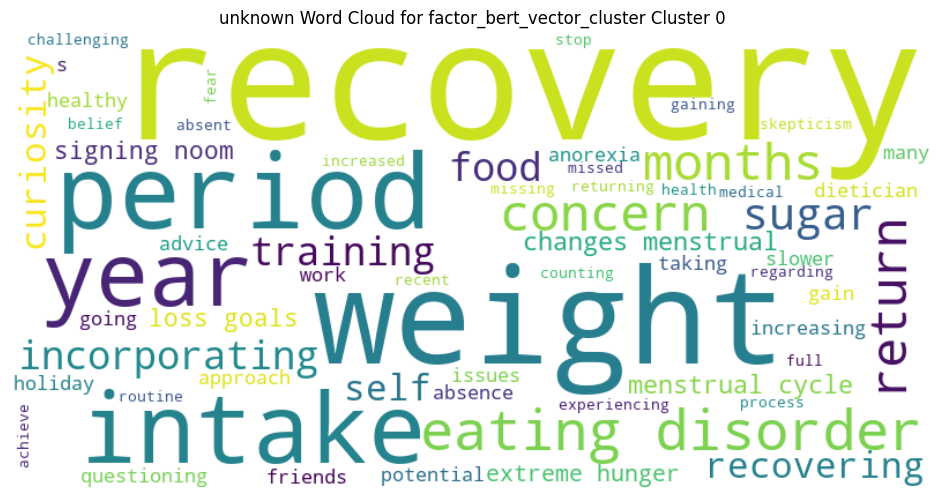

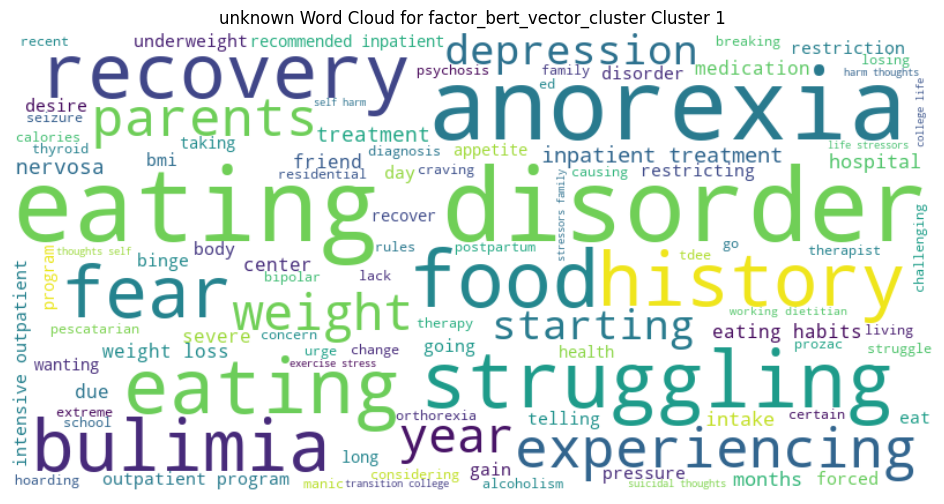

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import numpy as np


def generate_wordcloud(df, cluster_column, cluster):
    stop_words = set(stopwords.words('english'))
    texts = df[df[cluster_column] == cluster][thing[cluster_column]]
    filtered_words = []
    for text in texts:
        tokens = word_tokenize(text.lower())
        filtered_tokens = [
            token for token in tokens if token not in stop_words and token not in string.punctuation]
        filtered_words.extend(filtered_tokens)
    filtered_text = ' '.join(filtered_words)
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          max_words=100).generate(filtered_text)
    effect_type = df['effect_type_0'].values[0]
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{effect_type} Word Cloud for {cluster_column} Cluster {cluster}')
    plt.savefig(f'with_clusters/word_clouds/{effect_type} Word Cloud for {cluster_column} Cluster {cluster}.png')
    plt.show()


thing = {'ced_bert_vector_cluster': 'combined_effect_details',
         'factor_bert_vector_cluster': 'combined_factors'}

for df in [helpful, harmful, neutral, unknown]:
    print(df['effect_type_0'].values[0])
    for cluster_name in thing:
        optimal_n_clusters = np.max(df[cluster_name]) + 1
        for cluster in range(optimal_n_clusters):
            generate_wordcloud(df, cluster_name, cluster)


In [ ]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
# tfidf_matrix = vectorizer.fit_transform(positive_df['selftext'])

# def top_tfidf_features(cluster_texts, vectorizer, n=10):
#     matrix = vectorizer.transform(cluster_texts)
#     avg_tfidf = matrix.mean(axis=0).A1 
#     sorted_indices = np.argsort(avg_tfidf)[::-1]
#     return [(vectorizer.get_feature_names()[i], avg_tfidf[i]) for i in sorted_indices[:n]]

# for cluster in range(optimal_n_clusters):
#     cluster_texts = positive_df[positive_df['stb_cluster'] == cluster]['selftext']
#     print(f"Top TF-IDF words in cluster {cluster}: {top_tfidf_features(cluster_texts, vectorizer)}")


Top TF-IDF words in cluster 0: [('like', 0.047755701439564945), ('just', 0.04530592685388768), ('ed', 0.03926673345119742), ('did', 0.035754037920775875), ('ve', 0.03425097733846667), ('don', 0.03282016142877411), ('today', 0.031230140347550117), ('time', 0.03115697031377127), ('really', 0.03078499627811674), ('think', 0.029045245908250993)]
Top TF-IDF words in cluster 1: [('like', 0.07216406300037313), ('eating', 0.06332073911251687), ('just', 0.0625929894558309), ('weight', 0.05777288591381082), ('eat', 0.05695678474271449), ('feel', 0.056551954031063584), ('ve', 0.05383393889601696), ('know', 0.050882090796253616), ('really', 0.045827161831744026), ('time', 0.04575476189792191)]


/Users/anthonycampbell/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import pandas as pd
import nltk
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag

nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def common_pos_tags(texts, pos, n=10):
    words = []
    for text in texts:
        tokens = word_tokenize(text)
        tagged_tokens = pos_tag(tokens)
        words.extend([word for word, tag in tagged_tokens if tag.startswith(pos) and word.lower() not in stop_words])
    word_counts = Counter(words)
    return word_counts.most_common(n)


thing = {'ced_bert_vector_cluster': 'combined_effect_details',
         'factor_bert_vector_cluster': 'combined_factors'}

for df in [helpful, harmful, neutral, unknown]:
    print(df['effect_type_0'].values[0])
    for cluster_name in thing:
        optimal_n_clusters = np.max(df[cluster_name]) + 1
        for cluster in range(optimal_n_clusters):
            cluster_texts = df[df[cluster_name] == cluster][thing[cluster_name]]
            
            print(f"Top adjectives in {cluster_name} {cluster}: {common_pos_tags(cluster_texts, 'JJ')}")
            print(f"Top verbs in {cluster_name} {cluster}: {common_pos_tags(cluster_texts, 'VB')}")
            print(f"Top nouns in {cluster_name} {cluster}: {common_pos_tags(cluster_texts, 'NN')}")
            print("\n")


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/anthonycampbell/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anthonycampbell/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anthonycampbell/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


helpful
Top adjectives in ced_bert_vector_cluster 0: [('supportive', 13), ('positive', 11), ('helpful', 8), ('able', 7), ('first', 7), ('full', 5), ('different', 5), ('healthy', 5), ('new', 5), ('normal', 5)]
Top verbs in ced_bert_vector_cluster 0: [('eating', 37), ('Feeling', 17), ('help', 15), ('struggling', 11), ('feel', 11), ('healing', 8), ('seeking', 8), ('eat', 7), ('make', 7), ('recover', 6)]
Top nouns in ced_bert_vector_cluster 0: [('writer', 56), ('recovery', 48), ('disorder', 34), ('others', 29), ('eating', 22), ('support', 16), ('body', 14), ('disorders', 12), ('Writer', 12), ('towards', 12)]


Top adjectives in ced_bert_vector_cluster 1: [('due', 16), ('better', 15), ('new', 13), ('healthier', 13), ('healthy', 10), ('physical', 9), ('mental', 9), ('weight', 9), ('negative', 7), ('free', 7)]
Top verbs in ced_bert_vector_cluster 1: [('Feeling', 46), ('eating', 36), ('eat', 27), ('feeling', 13), ('Struggling', 10), ('Experiencing', 10), ('purging', 10), ('coping', 9), ('stop'